# <CENTER>STATISTICS MINI PROJECT</CENTER>

# <CENTER>AUTHOR:MOHINI MARATHE</CENTER>

In [1]:
#importing required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action="ignore")
import statistics
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import levene
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats import weightstats as stests
from scipy.stats import ttest_1samp,ttest_ind,ttest_rel
from scipy.stats import chisquare
from scipy.stats import chi2
from scipy.stats import chi2_contingency


from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import scikit_posthocs

# 1. Perform the following statistical analysis on the fifa world cup dataset. The dataset consists of player information which includes height, weight overall rating, potential etc. Data Cleaning and basic EDA process needs to be performed. 

Note: 
1) Perform all the Statistical analysis with 5%(Significance level). 
2) Perform the test of normality and test of variance in the appropriate places.


In [2]:
#dataset loading
df=pd.read_csv("fifa_stats.csv")
df.head()

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154


In [66]:
df.isna().sum()

Name                         0
Age                          0
Nationality                  0
Overall_rating               0
Potential                    0
Club                        19
Preferred Foot               0
International Reputation     0
Weak Foot                    0
Skill Moves                  0
Work Rate                    0
Position                     0
Jersey Number                0
Height                       0
Weight                       0
dtype: int64

In [195]:
df.describe()

,Age,Overall_rating,Potential,International Reputation,Weak Foot,Skill Moves,Jersey Number,Height,Weight
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,27.231500,78.197000,80.303500,1.774500,3.204000,2.919500,15.205500,5.781042,169.478000
std,3.859061,3.285969,4.114104,0.811775,0.728457,0.964098,13.210508,0.443337,16.050306
min,17.000000,75.000000,75.000000,1.000000,1.000000,1.000000,1.000000,5.083333,123.000000
25%,24.000000,76.000000,77.000000,1.000000,3.000000,2.000000,7.000000,5.500000,159.000000
50%,27.000000,77.000000,80.000000,2.000000,3.000000,3.000000,12.000000,6.000000,170.000000
75%,30.000000,80.000000,83.000000,2.000000,4.000000,4.000000,20.000000,6.166667,181.000000
max,41.000000,94.000000,95.000000,5.000000,5.000000,5.000000,99.000000,6.583333,227.000000


In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      2000 non-null   object 
 1   Age                       2000 non-null   int64  
 2   Nationality               2000 non-null   object 
 3   Overall_rating            2000 non-null   int64  
 4   Potential                 2000 non-null   int64  
 5   Club                      1981 non-null   object 
 6   Preferred Foot            2000 non-null   object 
 7   International Reputation  2000 non-null   int64  
 8   Weak Foot                 2000 non-null   int64  
 9   Skill Moves               2000 non-null   int64  
 10  Work Rate                 2000 non-null   object 
 11  Position                  2000 non-null   object 
 12  Jersey Number             2000 non-null   int64  
 13  Height                    2000 non-null   float64
 14  Weight  

In [9]:
df.columns

Index(['Name', 'Age', 'Nationality', 'Overall_rating', 'Potential', 'Club',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Position', 'Jersey Number', 'Height',
       'Weight'],
      dtype='object')

# a)	Assuming age as population, perform the central limit theorem with sample size of 200. Find the standard error and the mean of sampling distribution. Compare the results with population mean and standard deviation. Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size


In [12]:
pop=list(df["Age"])


In [13]:
import random
random.seed(200)
samp=random.sample(pop,k=200)


In [14]:
pop_mean=np.mean(pop)
pop_sd=np.std(pop)


sample_mean=np.mean(samp)
sample_std=np.std(samp)

In [15]:
print("sample_mean",sample_mean)
print("Sample_Std",sample_std)

sample_mean 27.205
Sample_Std 3.913179653427632


In [16]:
#std error
stderror=sample_std/np.sqrt(200)
stderror

0.2767035868939902

In [83]:
clt=(sample_mean-pop_mean)/stderror
#(pop_std/np.sqrt(200))
clt

-0.09577035230177476

In [17]:
pop_mean=np.mean(df["Age"])
pop_std=np.std(df["Age"])  
print("popmean",pop_mean) #N=2000
print("popstd",pop_std)

popmean 27.2315
popstd 3.8580963894127795


In [18]:
print("samplemean",sample_mean) #n=200
print("samplestd",sample_std)
print("stderror",stderror)

samplemean 27.205
samplestd 3.913179653427632
stderror 0.2767035868939902


As The sample size increases i.e. the sample size move towards attaining the true population size, because of which sample mean tends to move towards the population mean and hence the standard error decreases with increase in sample size

# b)	Is there any evidence that the players overall rating is greater than 80?


H0: There is evidence that Ratings are <=80
H1: There is evidence that Ratings are >80  #righttailed

In [94]:
zcrit=stats.norm.isf(0.05)
zcrit

1.6448536269514729

In [101]:
pop_mean=80
print(pop_mean)
xbar=np.mean(df["Overall_rating"])
print(xbar)
np.std(df["Overall_rating"])

80
78.197


3.285147028673068

In [106]:
zstat=(78.197-80)/(3.28/np.sqrt(2000))
zstat

-24.58311319165924

In [108]:
if zcrit<zstat:
    print("reject null")
else:
    print("fail to reject null")

fail to reject null


# Hence,we conclude that there is evidence that Ratings are >80

# c)	Perform the statistical test to identify whether preferred foot has any impact on potential. Also, perform the graphical analysis.


H0=There is an impact of preferred foot on potential
H1:There is atleast some impact of prefered foot on potential

In [70]:
df.columns

Index(['Name', 'Age', 'Nationality', 'Overall_rating', 'Potential', 'Club',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Position', 'Jersey Number', 'Height',
       'Weight'],
      dtype='object')

In [60]:
f_crt=stats.f.isf(0.05,1,1998)
f_crt


3.8461172252974345

In [53]:
l=df["Potential"][df["Preferred Foot"]=="Left"]
r=df["Potential"][df["Preferred Foot"]=="Right"]

In [61]:
f_test,pval=stats.f_oneway(l,r)
f_test,pval

(2.3648403497065615, 0.12425494914458383)

In [45]:
alpha=1-0.95
if 0.124<alpha:
    print("reject null")
else:
    print("fail to reject null")

fail to reject null


In [65]:
#other way
ftest=ols('Potential ~ Q("Preferred Foot")',df).fit()
anova=anova_lm(ftest,typ=1)
anova


,df,sum_sq,mean_sq,F,PR(>F)
"Q(""Preferred Foot"")",1.0,39.999624,39.999624,2.36484,0.124255
Residual,1998.0,33794.775876,16.914302,NaN,NaN


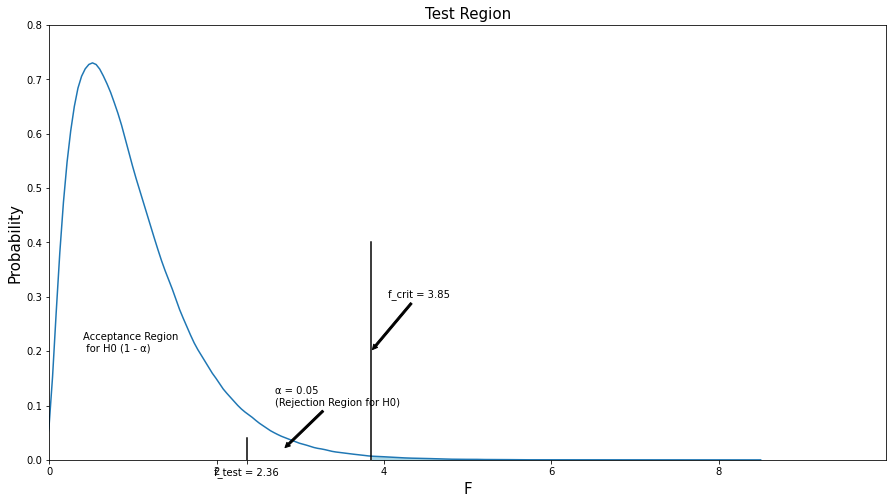

In [63]:
plt.figure(figsize=(15,8))
X = stats.f.rvs(dfn = 4, dfd = 995, size = 1000000, random_state = 15)

# pass the data to the parameter, 'a'
# 'hist=False' does not return the histogram 
# 'cumulative=False' in 'kde_kws' does not return the cumulative kernel density estimator
ax = sns.distplot(a = X, hist = False, kde_kws = dict(cumulative=False))

# set the limit for y-axis
plt.ylim(0, 0.8)

# set the limit for x-axis
plt.xlim(0, 10)

# use 'stats.f.isf()' to calculate the critical value for alpha = 0.05
# pass the value of 'alpha' to the parameter 'q'
# pass the degrees of freedom (= 4) to the parameter 'dfn' 
# pass the degrees of freedom (= 995) to the parameter 'dfd' 
f = stats.f.isf(q = 0.05, dfn = 1, dfd = 1998)

# plot a vertical line at f-value
x, y = [f, f], [0, 0.4]
plt.plot(x, y, color = 'black')

# plot a vertical line at f test value
x, y = [f_test, f_test], [0, 0.04]
plt.plot(x, y, color = 'black')

# add the color to the right of the f-value
# get the data for x and y axes
l1 = ax.lines[0]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]

# fill the color for the region where x-values are greater than the critical f-value
# pass the condition to shade the required region
# pass the required color to the parameter, 'color'
ax.fill_between(x1[x1 >= f], y1[x1 >= f], color = 'lightblue')

# use 'annonate' function to draw an arrow between points xy and xytext
# 's' is a argument to write text
# we can change the facecolor and arrowstyle; this is only for representation purpose
plt.annotate(s = 'α = 0.05\n(Rejection Region for H0)', xy = (2.8, 0.02), xytext = (2.7, 0.1), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(s = 'f_crit = '+ str(round(f,2)), xy = (f, 0.2), xytext = (f+0.2, 0.3), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

# use below code to print the values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text 
plt.text(x = 0.4, y = 0.2, s = 'Acceptance Region \n for H0 (1 - α)')

# assign the x-axis labels
# pass the position of labels to the parameter, 'ticks'
# pass the required labels to the parameter, 'labels'
plt.xticks(ticks = [0, 2, 4, 6, 8, round(f_test,2)], 
           labels = [0, 2, 4, 6, 8, 'f_test = '+str(round(f_test,2))])

# set plot and axes labels
# set text size using 'fontsize'
plt.xlabel('F', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.title('Test Region', fontsize = 15)

# display the plot
plt.show()

# Hence,we conclude there is an impact of preferred foot on potential

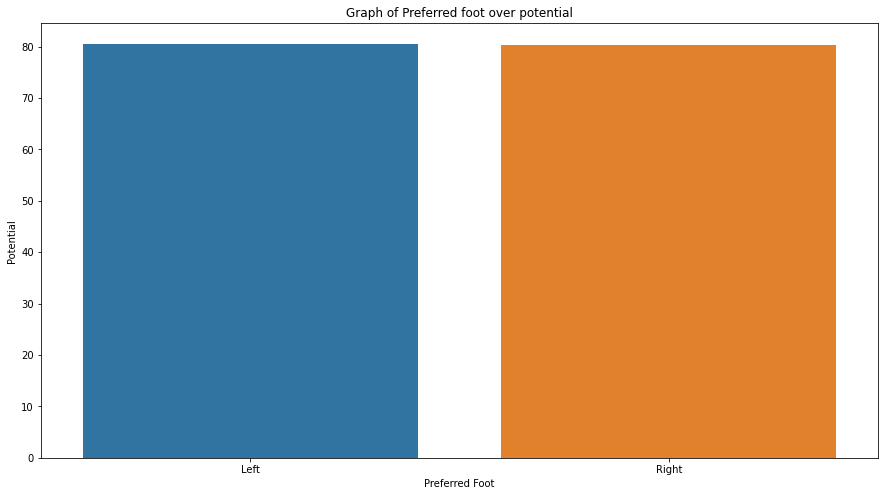

In [104]:
plt.figure(figsize=(15,8))
sns.barplot(df["Preferred Foot"],df["Potential"],ci=False)
plt.title("Graph of Preferred foot over potential")
plt.show()

# d)	Perform the statistical test to identify the relation between the overall rating and potential. [Assume both are continuous data points].


H0:There is relation between overall rating and potential
H1:There is no relation between overall rating and potential

In [4]:
stat,p=stats.levene(df["Overall_rating"],df["Potential"])
stat,p


(141.9704137312041, 3.4406841059319607e-32)

In [109]:
#ttest
stat,p=ttest_ind(df["Overall_rating"],df["Potential"])
stat,p

(-17.89175319557915, 6.241604310936382e-69)

In [112]:
alpha=1-0.95
if p<alpha:
    print("reject null")

reject null


# Hence we conclude there is no relation between overall rating and potential

# e)	Does skill move have any effect in overall rating. Perform the graphical analysis and the statistical analysis.


H0:There is effect of skill moves on overall rating
H0:There is no effect of skill moves on overall rating
#twotailed

In [10]:
tstat,p=ttest_ind(df["Skill Moves"],df["Overall_rating"])
tstat,p

(-983.0720466249821, 0.0)

In [113]:
if p<alpha:
    print("reject null")
else:
    print("fail to reject null")

reject null


# Hence we conclude there is no effect of skill moves on overall rating

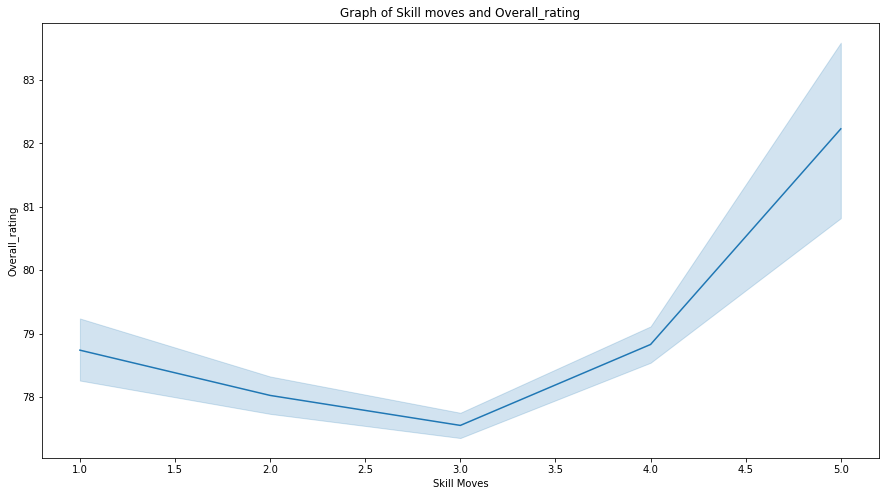

In [43]:
plt.figure(figsize=(15,8))
sns.lineplot(df["Skill Moves"],df["Overall_rating"])
plt.title("Graph of Skill moves and Overall_rating")
plt.show()

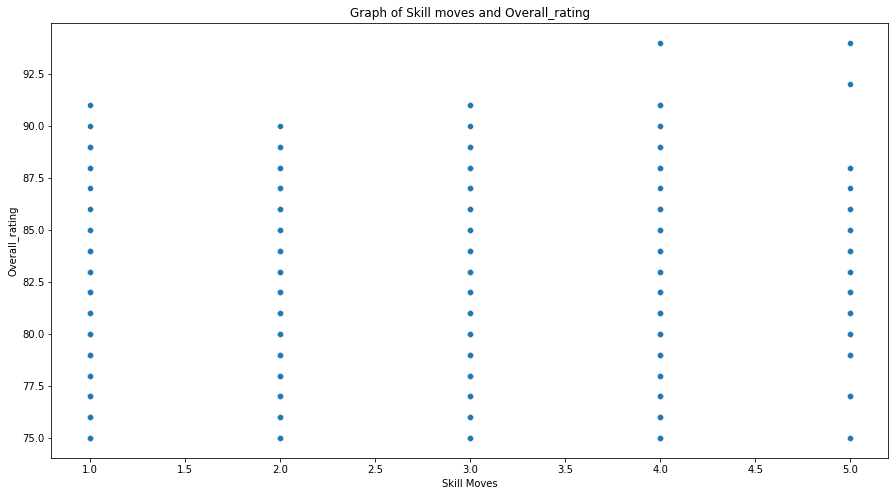

In [114]:
plt.figure(figsize=(15,8))
sns.scatterplot(df["Skill Moves"],df["Overall_rating"])
plt.title("Graph of Skill moves and Overall_rating")
plt.show()

# 2. Perform the following statistical analysis on the mobile network dataset given. The given data set contains information about the internet, calls, messages of various network. Data Cleaning and basic EDA process needs to be performed. 



Note: 
1) Perform all the Statistical analysis with 5%(Significance level). 
2) Perform the test of normality and test of variance in the appropriate places.


In [3]:
#reading dataset
df1=pd.read_csv("phone.csv")
df1.head(5)

,date,duration,item,month,network,network_type
0,15-10-14 6:58,221.321120,data,2014-11,data,data
1,15-10-14 6:58,81.610599,call,2014-11,Vodafone,mobile
2,15-10-14 14:46,143.109111,call,2014-11,Meteor,mobile
3,15-10-14 14:48,111.888670,call,2014-11,Tesco,mobile
4,15-10-14 17:27,246.695171,call,2014-11,Tesco,mobile


In [204]:
df1.describe()

,duration
count,820.000000
mean,144.304936
std,45.687777
min,0.993514
25%,112.916486
50%,144.179434
75%,175.932308
max,268.458090


In [205]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          820 non-null    object 
 1   duration      820 non-null    float64
 2   item          820 non-null    object 
 3   month         820 non-null    object 
 4   network       820 non-null    object 
 5   network_type  820 non-null    object 
dtypes: float64(1), object(5)
memory usage: 38.6+ KB


In [194]:
df1.isna().sum()

date            0
duration        0
item            0
month           0
network         0
network_type    0
dtype: int64

No null values

# a) With 95% & 99% Confidence Interval find the range estimate of average duration calls made by all the network. Which of the Intervals are wider? Interpret the results.


In [209]:
sm=np.mean(df1["duration"])
sm
sd=np.std(df1["duration"])
sd
n=len(df1)

In [213]:
CI1=stats.norm.interval(0.95,loc=sm,scale=sd/np.sqrt(n))
print("Confidence Interval at 95%",CI1)

Confidence Interval at 95% (141.1797470762666, 147.4301240434043)


In [214]:
CI2=stats.norm.interval(0.99,loc=sm,scale=sd/np.sqrt(n))
print("Confidence Interval at 99%",CI2)

Confidence Interval at 99% (140.1977416835259, 148.41212943614502)


In [217]:
CI2 with 99% confidence interval is wider by emperical rule

# b) Perform statistical analysis to check whether the networks are equally distributed in the dataset.


H0:Networks are equally distributed
H1:Networks are not equally distributed

In [4]:
df1.head(1)

,date,duration,item,month,network,network_type
0,15-10-14 6:58,221.32112,data,2014-11,data,data


In [14]:
tab=pd.crosstab(df1["network"],df1["network"])
tab

network,Meteor,Tesco,Three,Vodafone,data,landline,voicemail
network,,,,,,,
Meteor,87,0,0,0,0,0,0
Tesco,0,84,0,0,0,0,0
Three,0,0,215,0,0,0,0
Vodafone,0,0,0,215,0,0,0
data,0,0,0,0,150,0,0
landline,0,0,0,0,0,42,0
voicemail,0,0,0,0,0,0,27


In [15]:
chistat=stats.chi.isf(alpha/2,df=36)
chistat

7.378163296635093

In [16]:
obs=tab.values
obs

array([[ 87,   0,   0,   0,   0,   0,   0],
       [  0,  84,   0,   0,   0,   0,   0],
       [  0,   0, 215,   0,   0,   0,   0],
       [  0,   0,   0, 215,   0,   0,   0],
       [  0,   0,   0,   0, 150,   0,   0],
       [  0,   0,   0,   0,   0,  42,   0],
       [  0,   0,   0,   0,   0,   0,  27]], dtype=int64)

In [17]:
chi,p,dof,exp=stats.chi2_contingency(obs,correction=False)
chi,p,dof
print("chival",chi)
print("pval",p)
print("dof",dof)


chival 4920.0
pval 0.0
dof 36


In [18]:
print(exp)

[[ 9.2304878   8.91219512 22.81097561 22.81097561 15.91463415  4.45609756
   2.86463415]
 [ 8.91219512  8.60487805 22.02439024 22.02439024 15.36585366  4.30243902
   2.76585366]
 [22.81097561 22.02439024 56.37195122 56.37195122 39.32926829 11.01219512
   7.07926829]
 [22.81097561 22.02439024 56.37195122 56.37195122 39.32926829 11.01219512
   7.07926829]
 [15.91463415 15.36585366 39.32926829 39.32926829 27.43902439  7.68292683
   4.93902439]
 [ 4.45609756  4.30243902 11.01219512 11.01219512  7.68292683  2.15121951
   1.38292683]
 [ 2.86463415  2.76585366  7.07926829  7.07926829  4.93902439  1.38292683
   0.88902439]]


In [258]:
if p<alpha:
    print("reject null")
else:
    print("fail to reject null")

reject null


In [128]:
if chistat<chi:
    print("reject null")
else:
    print("fail to reject null")

reject null


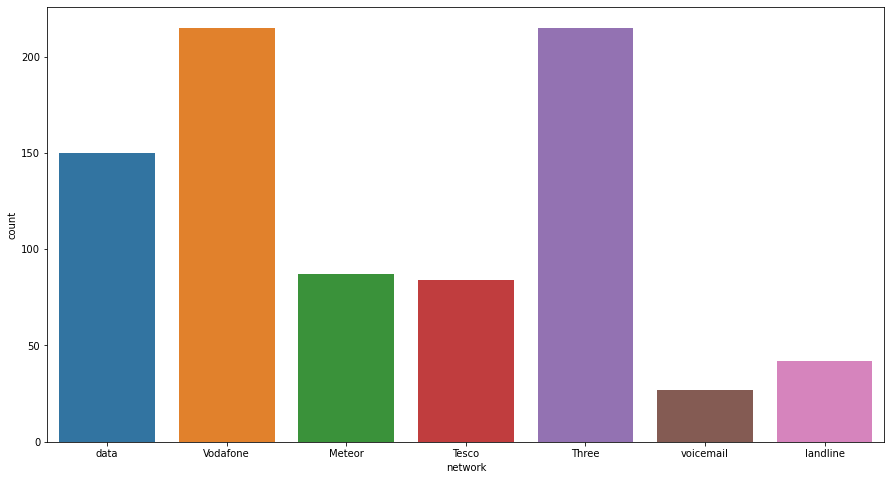

In [8]:
plt.figure(figsize=(15,8))
sns.countplot(df1["network"])
plt.show()

# Hence we conclude networks are not equally distributed

# c) Plot the distribution of duration with respect to each network in the same graph and Interpret the results from the graph.


In [260]:
df1.head()

,date,duration,item,month,network,network_type
0,15-10-14 6:58,221.321120,data,2014-11,data,data
1,15-10-14 6:58,81.610599,call,2014-11,Vodafone,mobile
2,15-10-14 14:46,143.109111,call,2014-11,Meteor,mobile
3,15-10-14 14:48,111.888670,call,2014-11,Tesco,mobile
4,15-10-14 17:27,246.695171,call,2014-11,Tesco,mobile


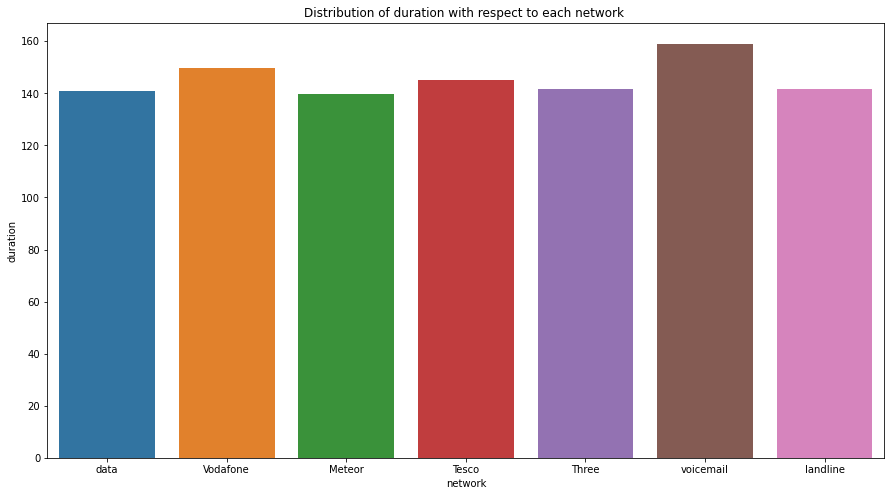

In [264]:
plt.figure(figsize=(15,8))
sns.barplot(df1["network"],df1["duration"],ci=False)
plt.title("Distribution of duration with respect to each network ")
plt.show()

We interpret that Voicemail has highest distribution where as meteor has lowest distribution

# d)	Perform statistical tests to identify the relation between item and duration. Detailed explanation of relation between the classes is required.


H0:There is relation between item and duration
H1:There is atleast one difference relation between item and duration

In [283]:
df1[["item","duration"]]

,item,duration
0,data,221.321120
1,call,81.610599
2,call,143.109111
3,call,111.888670
4,call,246.695171
...,...,...
815,data,185.328156
816,data,89.819383
817,data,117.604998
818,sms,77.834006


In [66]:
fcrit=stats.f.isf(0.05,2,817)
fcrit

3.0067437669029107

In [20]:
fstat=stats.f.isf(0.05,2,817)
fstat
test=ols('duration ~ Q("item")',df1).fit()
anova=anova_lm(test,typ=1)
anova

,df,sum_sq,mean_sq,F,PR(>F)
"Q(""item"")",2.0,8.044792e+03,4022.395964,1.931396,0.145607
Residual,817.0,1.701514e+06,2082.636053,NaN,NaN


In [56]:
if fstat<1.93:
    print("reject null")
else:
    print("fail to reject null")

fail to reject null


In [57]:
if 0.14<alpha:
    print("reject null")
else:
    print("fail to reject null")

fail to reject null


We assume the population to be normal and have same variance also they are random and independent So we interpret the following:
The degree of freedom obtained between is 2 and within is 817 
sumof squares obtained between is 8.044792e+03 and within is 1.701514e+06
mean squares of sum obtained is 4022.395964 and within is 2082.636053
F value comes as 1.93 which is < than fcritical and p value 0.145 which is  > than 0.05 so here we say,
we fail to reject null and hence there exists a relation between items and duration.

# Hence,we conclude there is a relation between item and duration

# e)	Perform statistical tests to identify the relation between network and network_type. 


H0:There is relation between network and network_type
H1:There is no relation between network and network_type

In [269]:
df1.head(1)

,date,duration,item,month,network,network_type
0,15-10-14 6:58,221.32112,data,2014-11,data,data


In [21]:
tab=pd.crosstab(df1["network"],df1["network_type"])
tab

network_type,data,landline,mobile,voicemail
network,,,,
Meteor,0,0,87,0
Tesco,0,0,84,0
Three,0,0,215,0
Vodafone,0,0,215,0
data,150,0,0,0
landline,0,42,0,0
voicemail,0,0,0,27


In [22]:
obs=tab.values

In [23]:
chicrit=stats.chi.isf(alpha,df=18)
chicrit

5.373015859867959

In [24]:
chi,p,dof,exp=stats.chi2_contingency(obs,correction=False)
chi,p,dof
print("chistat",chi)
print("pval",p)
print("dof",dof)

chistat 2460.0
pval 0.0
dof 18


In [25]:
print(exp)

[[ 15.91463415   4.45609756  63.76463415   2.86463415]
 [ 15.36585366   4.30243902  61.56585366   2.76585366]
 [ 39.32926829  11.01219512 157.57926829   7.07926829]
 [ 39.32926829  11.01219512 157.57926829   7.07926829]
 [ 27.43902439   7.68292683 109.93902439   4.93902439]
 [  7.68292683   2.15121951  30.78292683   1.38292683]
 [  4.93902439   1.38292683  19.78902439   0.88902439]]


In [282]:
if chicrit<chi:
    print("reject null")
else:
    print("fail to reject null")

reject null


In [276]:
if p<alpha:
    print("reject null")
else:
    print("fail to reject null")

reject null


# Hence,we conclude there is relation between network and network_type

# END